In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

In [11]:
df = pd.read_csv('.\\..\\..\\Dataset\\testes\\casos_mensais_total.csv')
#df.set_index('dt_notificacao', as_index=False, inplace=True)

Mean Squared Error: 30876130911.60


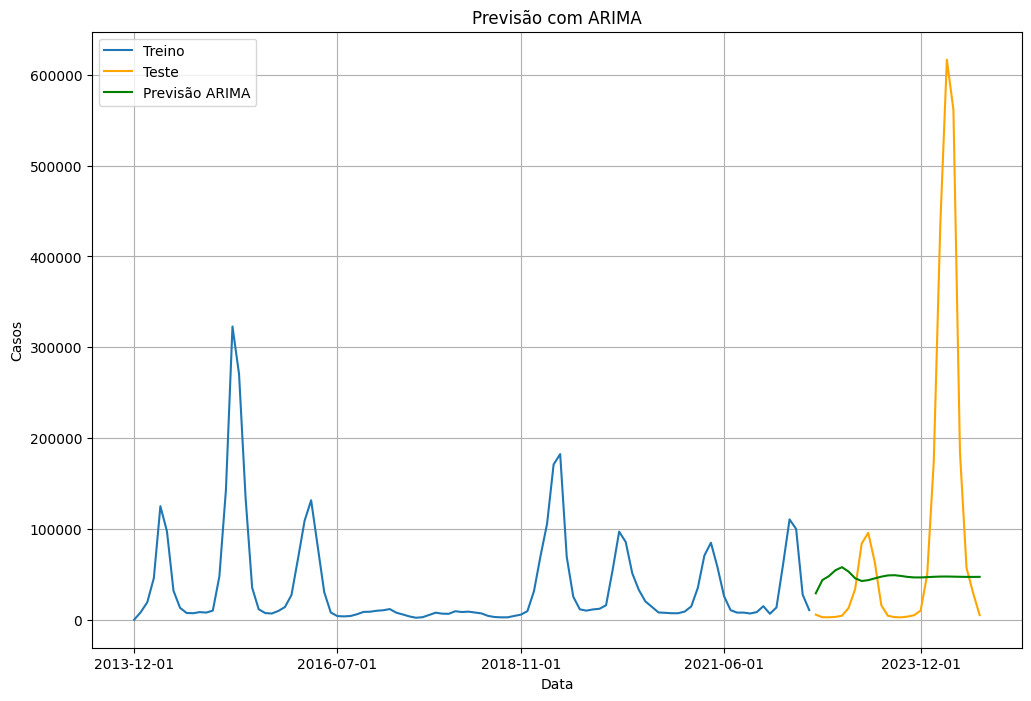

In [13]:
# Dividir os dados em treino e teste
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Treinar o modelo ARIMA
p, d, q = 5, 1, 0  # Parâmetros do modelo ARIMA (ajuste conforme necessário)
model = ARIMA(train['casos'], order=(p, d, q))
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=len(test))

# Avaliar o modelo
mse = mean_squared_error(test['casos'], forecast)
print(f'Mean Squared Error: {mse:.2f}')

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(train['dt_notificacao'], train['casos'], label='Treino')
plt.plot(test['dt_notificacao'], test['casos'], label='Teste', color='orange')
plt.plot(test['dt_notificacao'], forecast, label='Previsão ARIMA', color='green')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
plt.title('Previsão com ARIMA')
plt.xlabel('Data')
plt.ylabel('Casos')
plt.legend()
plt.grid(True)
plt.show()
